# 1. Chargement des données

In [4]:
import pandas as pd

# Charger le jeu de données
df = pd.read_csv("dataDiabète.csv")

# Aperçu de la structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                768 non-null    int64  
 1   Pregnancies               768 non-null    int64  
 2   Glucose                   768 non-null    int64  
 3   BloodPressure             768 non-null    int64  
 4   SkinThickness             768 non-null    int64  
 5   Insulin                   768 non-null    int64  
 6   BMI                       768 non-null    float64
 7   DiabetesPedigreeFunction  768 non-null    float64
 8   Age                       768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Unnamed: 0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  \
0           0            6      148             72             35        0   
1           1            1       85             66             29        0   
2

In [5]:
df = df.drop('Unnamed: 0', axis=1)

le df après la suppression de la colonne Unnamed

# 2. Analyse exploratoire des données (EDA)

**2.1 Vérification des dimensions et types**

In [6]:
print("Dimensions :", df.shape)
print("Types de données :", df.dtypes)

Dimensions : (768, 8)
Types de données : Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object


**2.2 Valeurs manquantes**

In [7]:
print("Valeurs manquantes par colonne :")
print(df.isnull().sum())

Valeurs manquantes par colonne :
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


aucun valeurs manquantes

**2.3 Doublons**

In [8]:
print("Nombre de doublons :", df.duplicated().sum())

Nombre de doublons : 0


**2.4 Distribution des variables numériques**

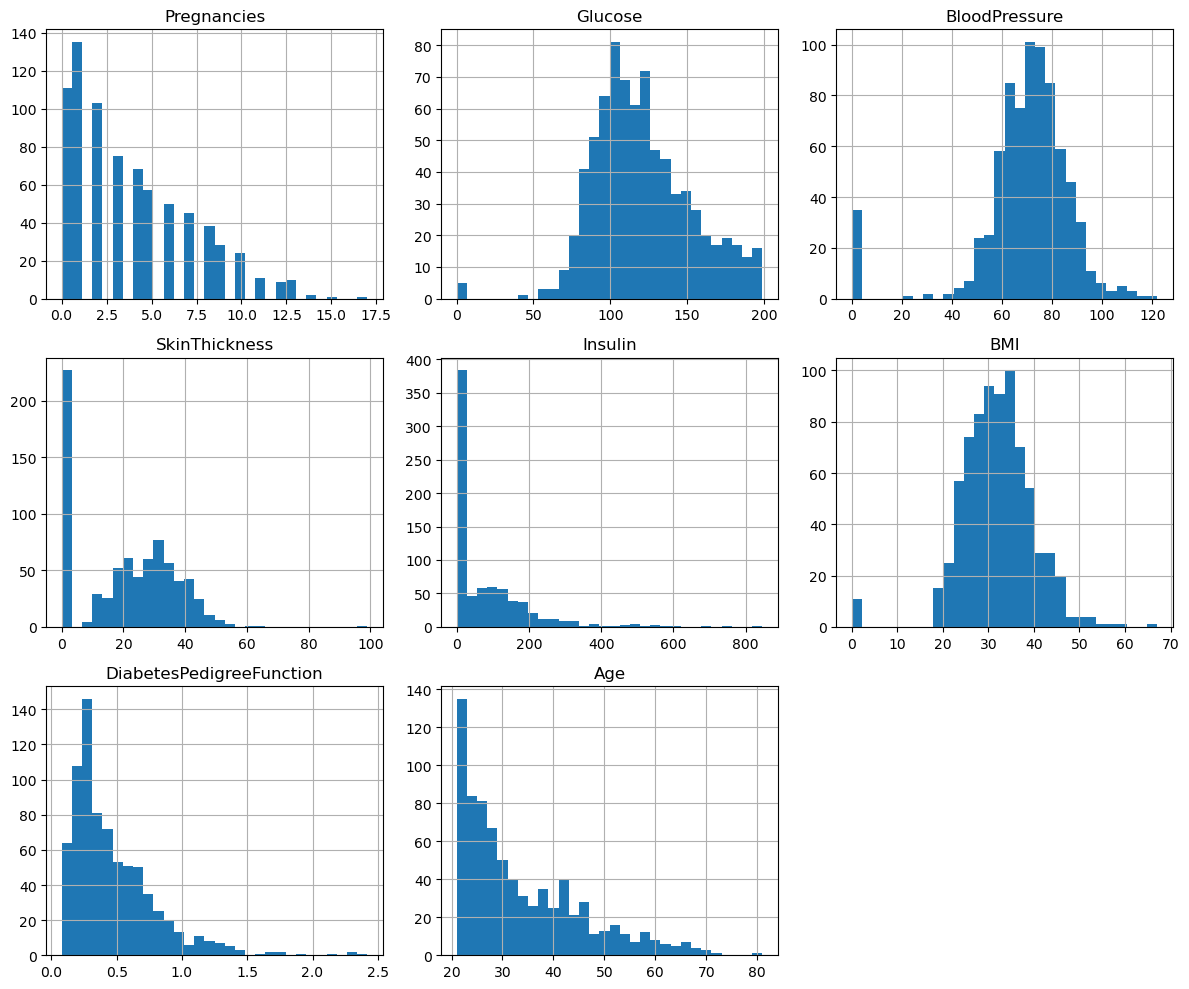

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df.hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


**2.5 Corrélation entre variables**

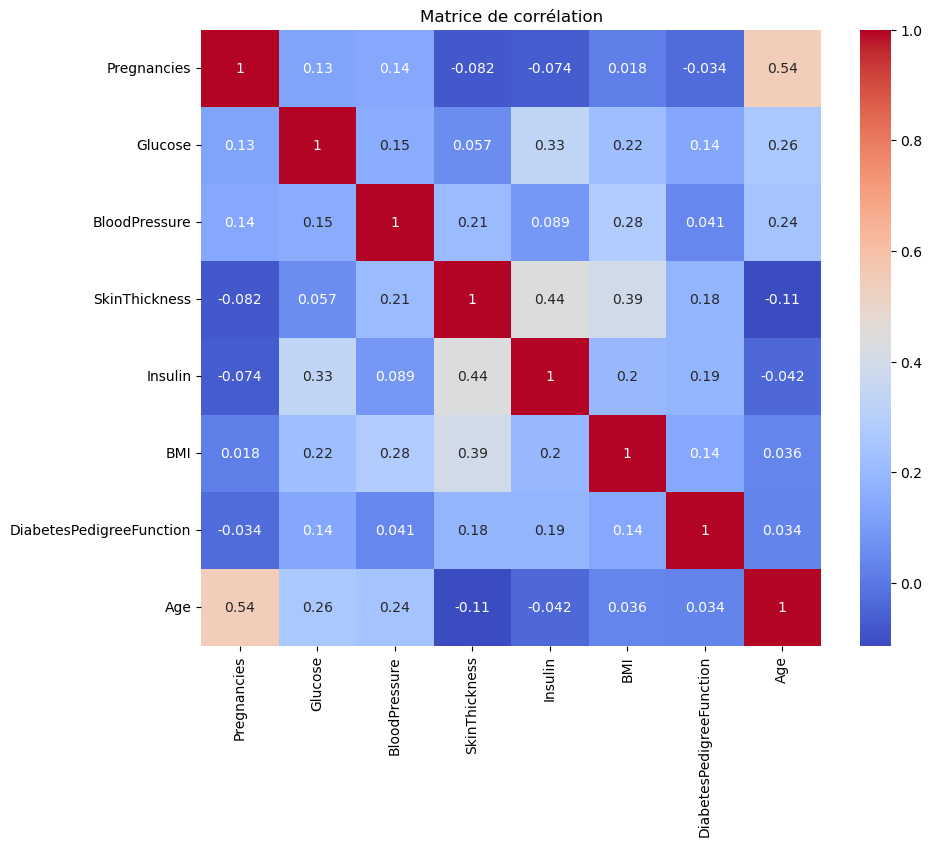

: 

: 

: 

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Matrice de corrélation")
plt.show()


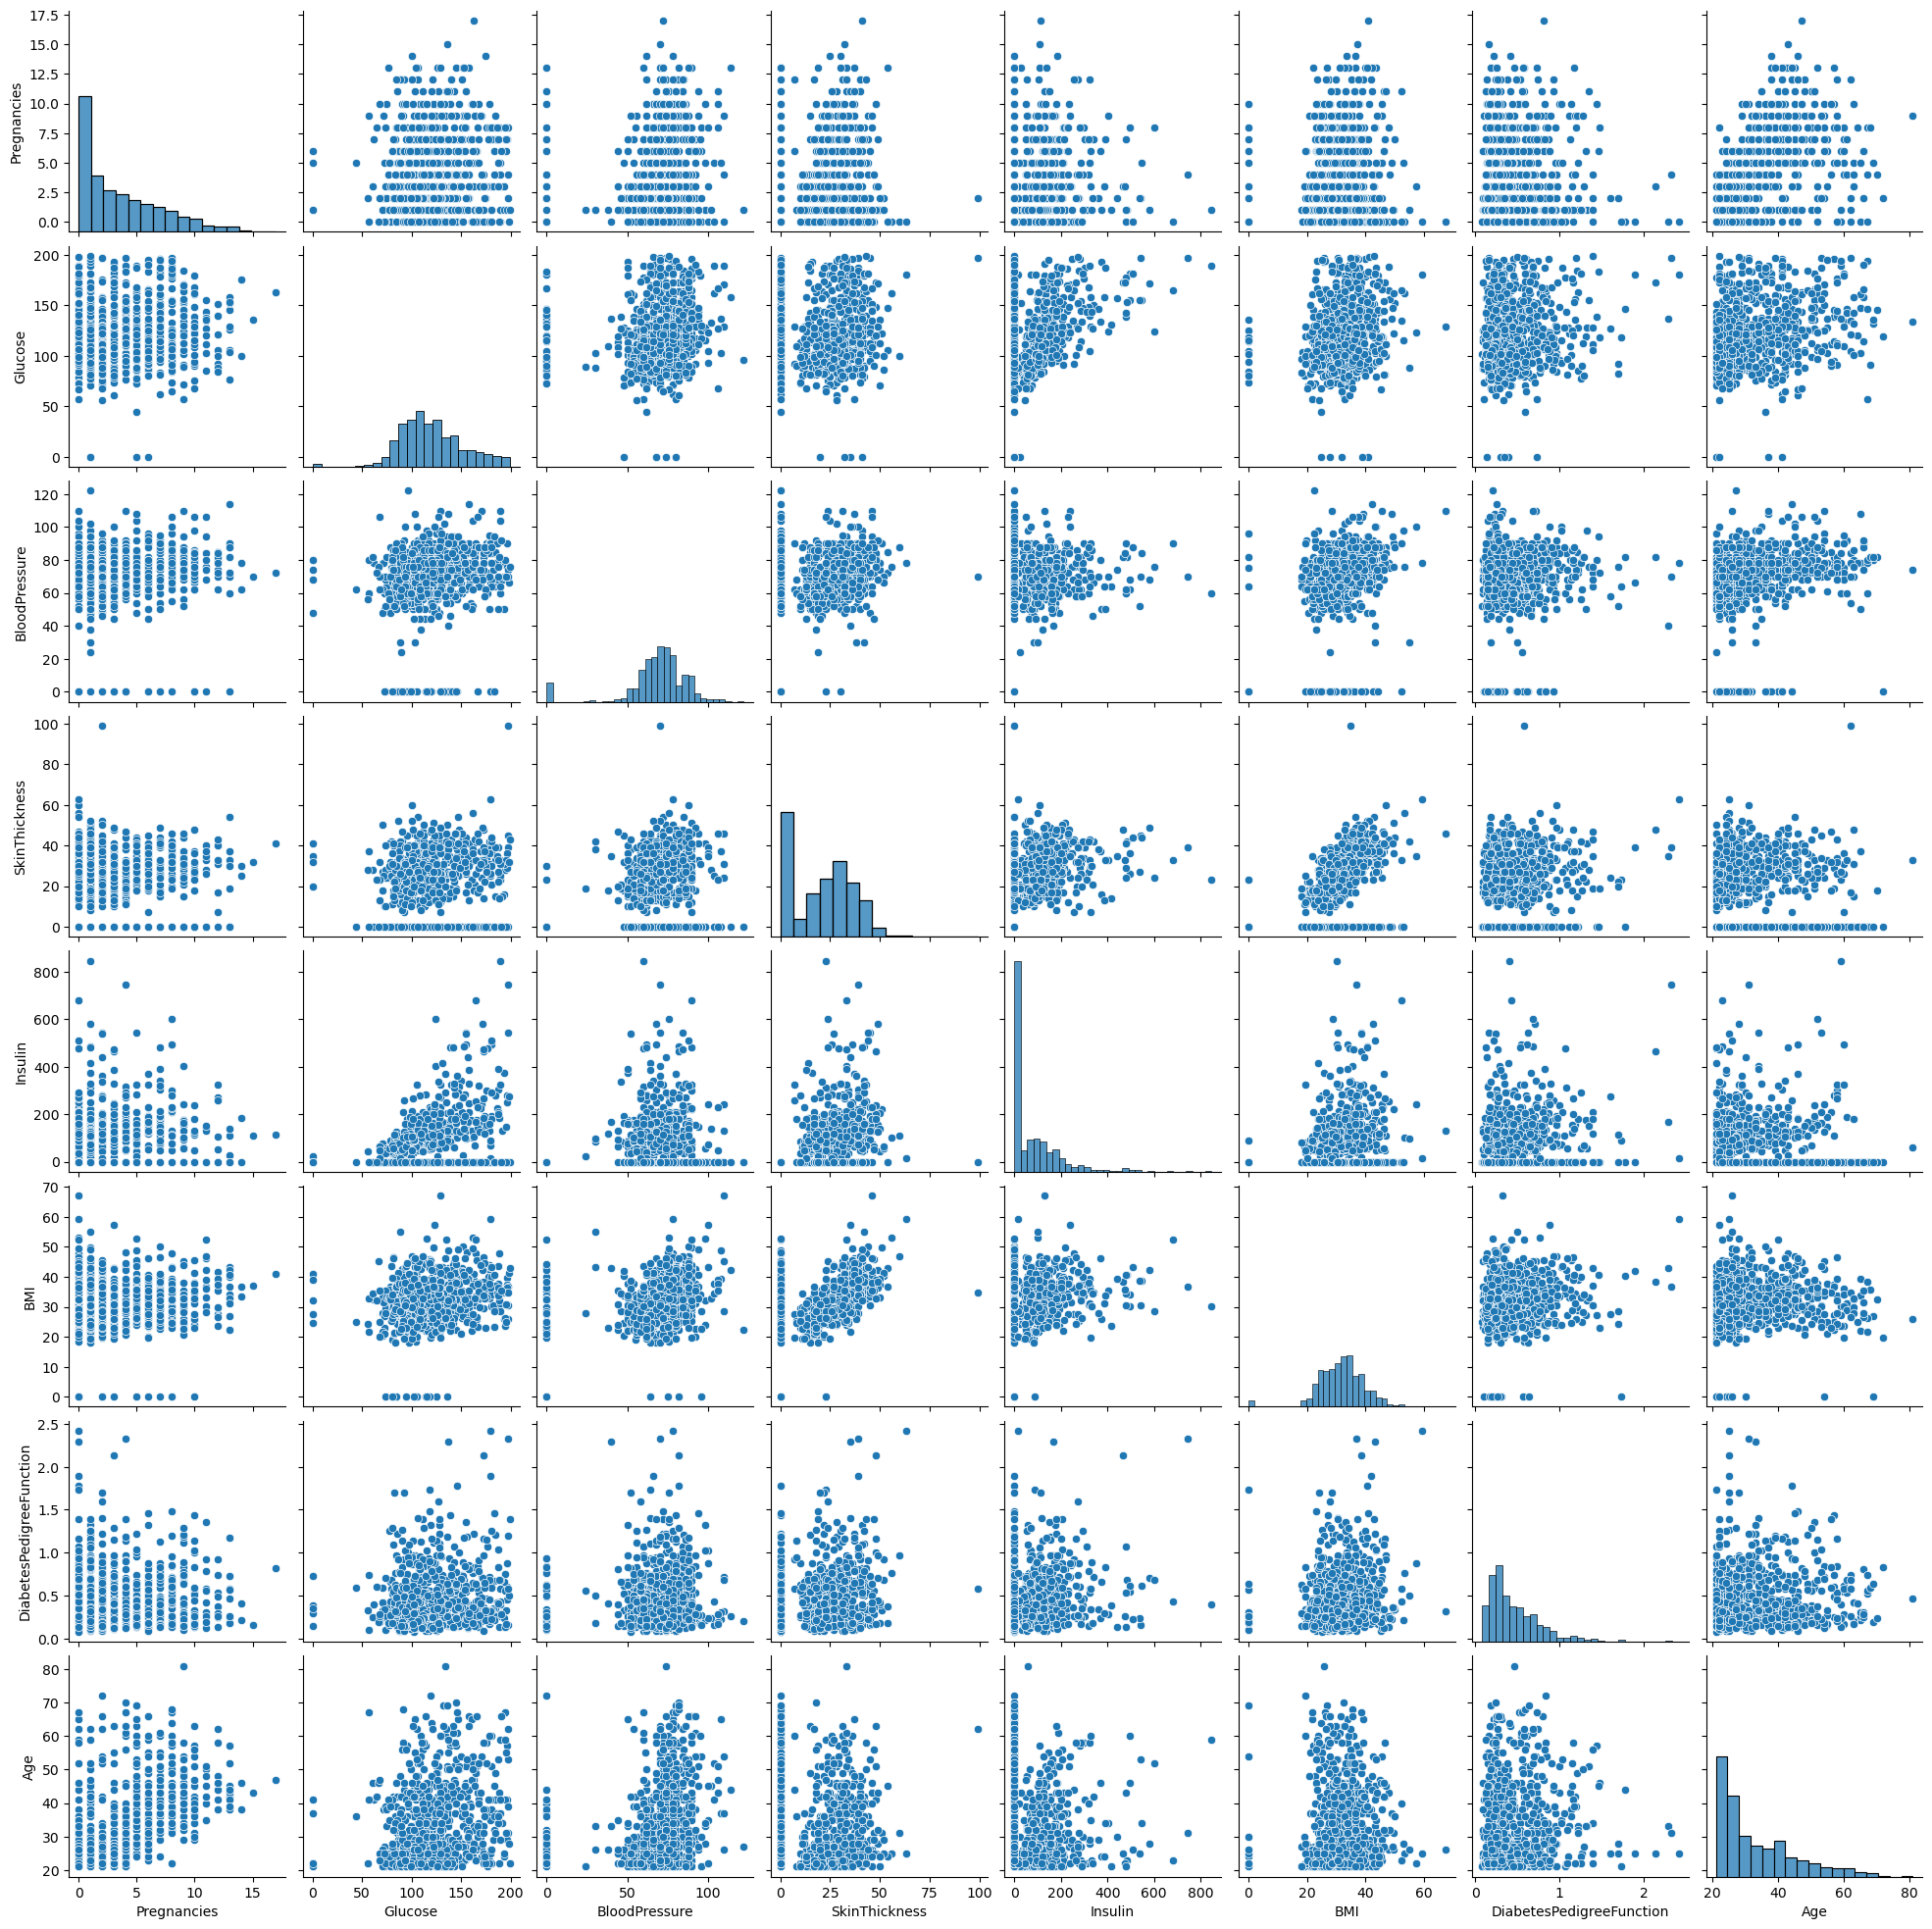

: 

: 

: 

In [ ]:
sns.pairplot(df)
plt.show()

# 3. Prétraitement des données

**3.1 Gestion des valeurs manquantes**


rien a supp puisqu'il n'existe plus

**3.2 Détection et suppression des valeurs aberrantes**

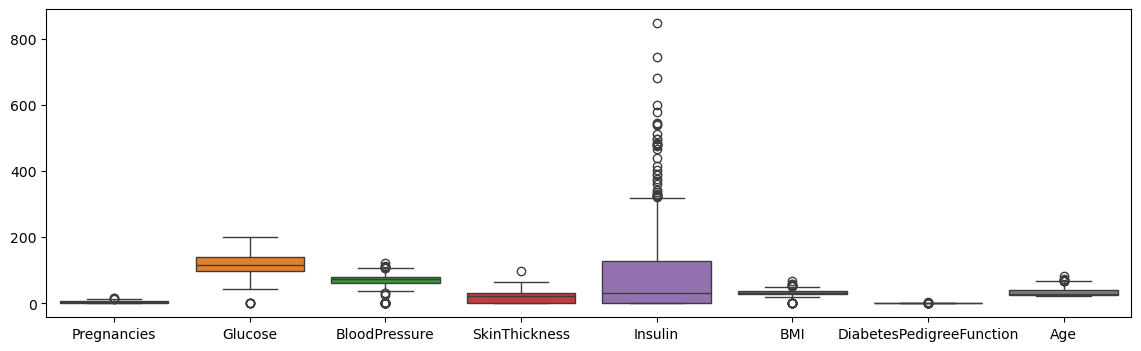

: 

: 

: 

In [ ]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
sns.boxplot(df)
plt.show()

Ces graphiques sont excellents pour visualiser la distribution, la dispersion et la présence de valeurs aberrantes (outliers) dans chaque variable.

- Pregnancies (Grossesses) Distribution : Très concentrée vers des valeurs faibles (0-5 environ). La médiane semble être autour de 1-2.
- Glucose (Glucose) Distribution : La boîte est large, indiquant une bonne dispersion. La médiane est autour de 110-120
- BloodPressure (Tension Artérielle) Distribution : La médiane est autour de 70-75. La boîte est de taille moyenne
- SkinThickness (Épaisseur de la Peau) Distribution : Médiane autour de 20-25. La boîte est de taille moyenne
- BMI (Indice de Masse Corporelle) Distribution : La médiane est autour de 30-35. La boîte est de taille moyenne.

In [10]:
#IQR
def remove_outliers(df_selected,colom_name) :
  for colm in colom_name :
    Q1 = df_selected[colm].quantile(0.25)
    Q3 = df_selected[colm].quantile(0.75)
    IQR = Q3 - Q1
    Borne_min = Q1 - 1.5 * IQR
    Borne_max = Q3 + 1.5 * IQR
    df_selected = df_selected[(df_selected[colm] >= Borne_min) & (df_selected[colm] <= Borne_max)]
  return df_selected
colon_net=['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_clean = remove_outliers(df,colon_net)

print("nouveau_shape",df_clean.shape)


nouveau_shape (709, 8)


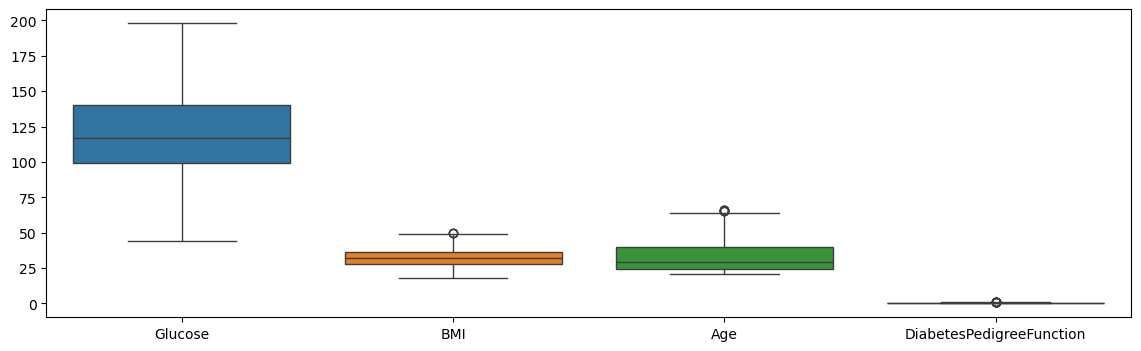

: 

: 

: 

In [ ]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
# Plot boxplots for the specified columns
sns.boxplot(data=df_clean[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']])
plt.show()

In [11]:
variance_by_column = df_clean.var()
print("\n--- Variance de chaque variable numérique ---")
print(variance_by_column)


--- Variance de chaque variable numérique ---
Pregnancies                    11.380703
Glucose                       905.588009
BloodPressure                 327.136067
SkinThickness                 249.037879
Insulin                     12481.419780
BMI                            42.063427
DiabetesPedigreeFunction        0.062975
Age                           124.504291
dtype: float64


Une forte variance indique que les points de données sont très éloignés de la moyenne et les uns des autres, tandis qu'une faible variance indique qu'ils sont groupés autour de la moyenne.

- Insulin (très élevé) : Confirme la forte dispersion et la présence d'outliers. Nécessitera très probablement une mise à l'échelle et potentiellement une transformation pour les modèles

- Glucose, SkinThickness, BloodPressure, Age : Ont des variances plus élevées qui justifient également une mise à l'échelle pour la plupart des algorithmes de machine learning afin d'éviter qu'elles ne dominent le processus d'apprentissage.

**4. Sélection des variables pour le clustering**

In [12]:
features = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_clean = df_clean[features]

In [ ]:
df_clean

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,148,33.6,50,0.627
1,85,26.6,31,0.351
2,183,23.3,32,0.672
3,89,28.1,21,0.167
5,116,25.6,30,0.201
...,...,...,...,...
763,101,32.9,63,0.171
764,122,36.8,27,0.340
765,121,26.2,30,0.245
766,126,30.1,47,0.349


: 

: 

: 

**5. Visualisation des relations entre variables**

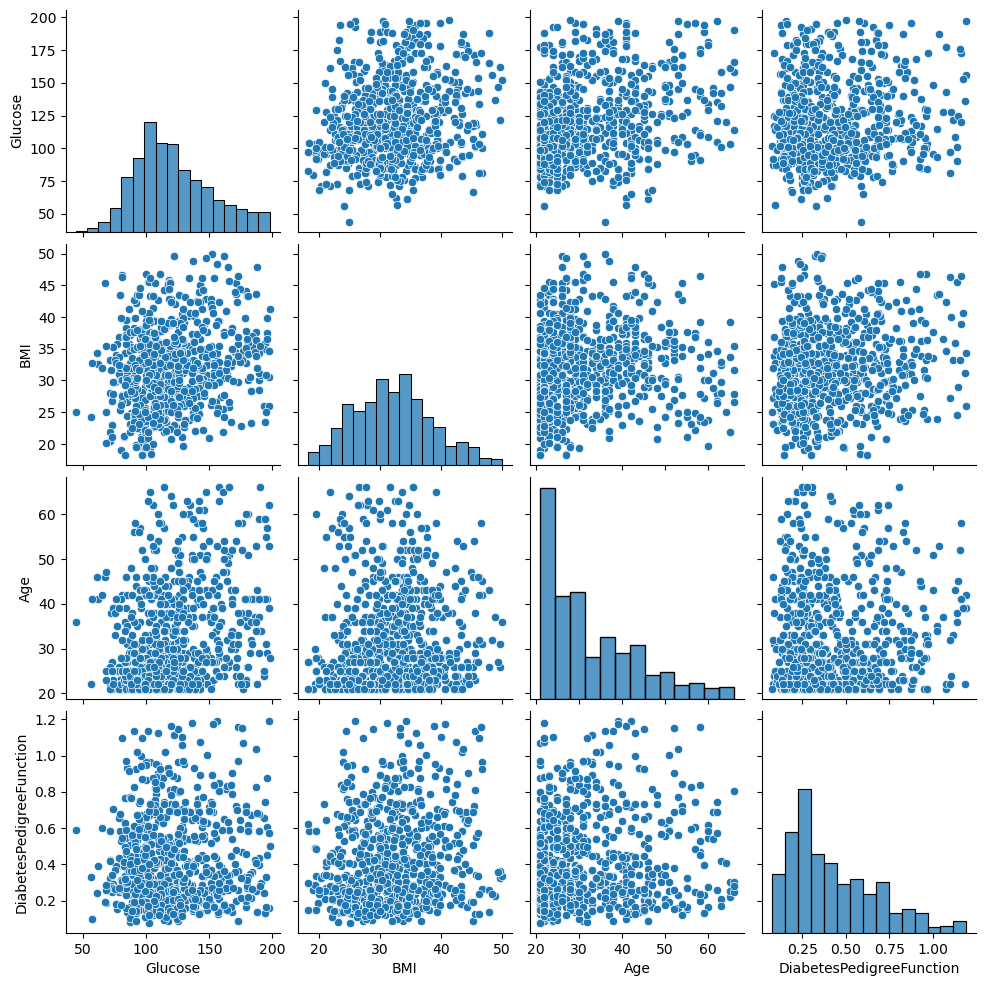

In [13]:
sns.pairplot(df_clean)
plt.show()

**6. Mise à l’échelle des variables**

In [14]:
from sklearn.preprocessing import StandardScaler
import joblib


clustering_cols = ['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']
df_clustering = df[clustering_cols].copy()

# Initialiser le StandardScaler
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(df_clean)
# Facultatif : reconvertir en DataFrame
df_clean_S = pd.DataFrame(X_scaled, columns=features)


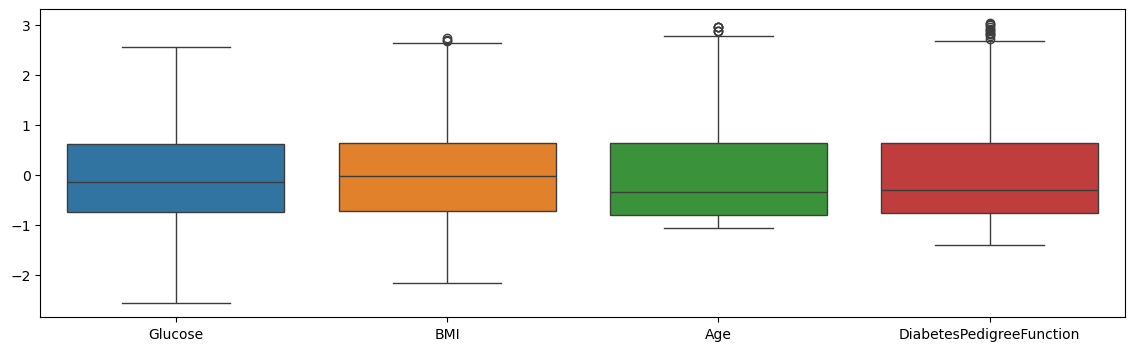

: 

: 

: 

In [ ]:
#boîte à moustaches
plt.figure(figsize=(14, 4))
# Plot boxplots for the specified columns
sns.boxplot(data=df_clean_S[['Glucose', 'BMI', 'Age', 'DiabetesPedigreeFunction']])
plt.show()

In [ ]:
df_clean_S

,Glucose,BMI,Age,DiabetesPedigreeFunction
0,0.889598,0.217690,1.531330,0.785203
1,-1.205391,-0.862381,-0.172664,-0.315398
2,2.053480,-1.371557,-0.082980,0.964648
3,-1.072376,-0.630937,-1.069502,-1.049132
4,-0.174524,-1.016677,-0.262347,-0.913551
...,...,...,...,...
704,-0.673331,0.109683,2.697220,-1.033181
705,0.024999,0.711436,-0.531399,-0.359263
706,-0.008255,-0.924099,-0.262347,-0.738093
707,0.158014,-0.322346,1.262278,-0.323374


: 

: 

: 

Échelle Homogène : Toutes les variables (Glucose, BMI, Age, DiabetesPedigreeFunction, et toute autre colonne standardisée) sont maintenant sur la même échelle. Leurs valeurs varient généralement entre -3 et +3 (environ) avec une moyenne de 0 et un écart-type de 1


# 6. clustering K-Means

In [15]:
from sklearn.cluster import KMeans

In [16]:
import os
os.environ["OMP_NUM_THREADS"] = "3"  # 1, 2 ou 3
from sklearn.cluster import KMeans

**6. Détermination de la valeur optimale de k (méthode du coude)**

In [17]:
inertias = []  # liste pour stocker l'inertie pour chaque k

k_range = range(1, 8)  # on teste les valeurs de k de 1 à 8

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)  # inertie = somme des distances intra-cluster

c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklea

📌 L'avertissement signale que l'implémentation de KMeans dans scikit-learn peut présenter une "fuite de mémoire" (memory leak) sur les systèmes d'exploitation Windows, surtout lorsqu'elle utilise la bibliothèque MKL (Math Kernel Library) d'Intel.

**6.2 Tracer la courbe du coude**

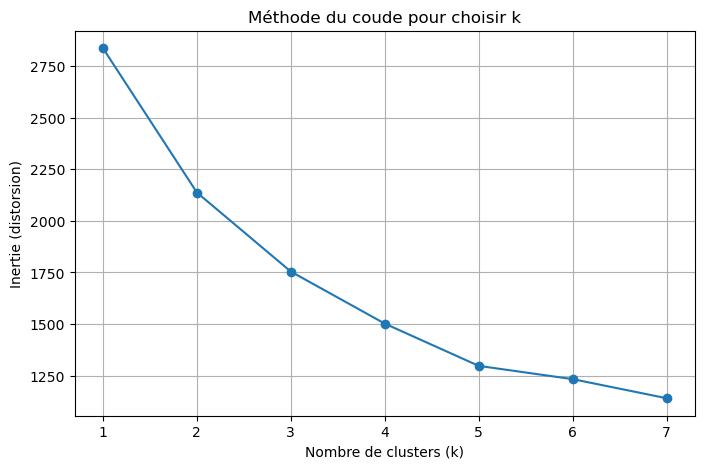

In [18]:
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertias, marker='o')
plt.title("Méthode du coude pour choisir k")
plt.xlabel("Nombre de clusters (k)")
plt.ylabel("Inertie (distorsion)")
plt.grid(True)
plt.show()

L'inertie, aussi appelée somme des carrés des erreurs intra-cluster (WCSS - Within-Cluster Sum of Squares), mesure la dispersion des points de données à l'intérieur de leurs clusters respectifs. Plus l'inertie est faible, plus les points sont proches des centroïdes de leurs clusters, et donc plus les clusters sont "compacts".

--> Le but de la méthode du coude est de trouver le point sur la courbe où la diminution de l'inertie commence à ralentir de manière significative, formant un "coude" ou une "cassure" distincte. Au-delà de ce point, ajouter plus de clusters n'apporte plus un gain substantiel en termes de réduction de l'inertie.

**6.3 Entraînement du modèle K-Means avec le k optimal**

In [19]:
k_optimal = 2
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**6.4 Ajouter une colonne Cluster au dataset original**

In [20]:
df_clean_S['Cluster'] = clusters

**6.5 Visualiser la répartition des observations par cluster**

In [21]:
print(df_clean_S['Cluster'].value_counts())

Cluster
0    404
1    305
Name: count, dtype: int64


Cette sortie est un peu ambigüe en termes de format, mais elle indique une répartition des observations dans différents clusters.

C:\Users\Rehmi Salma\AppData\Local\Temp\ipykernel_17492\153506695.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


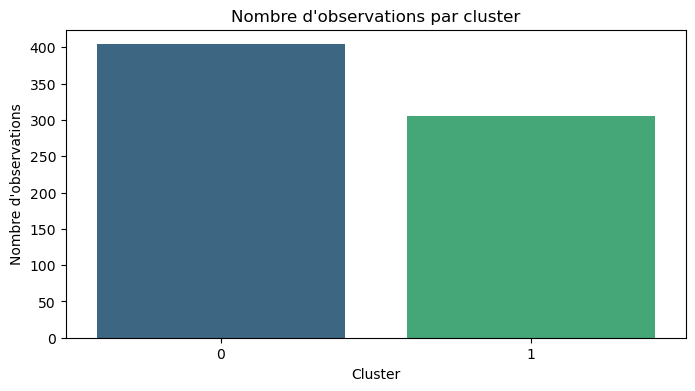

: 

: 

: 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exemple avec des données labellisées (kmeans.labels_)
cluster_counts = pd.Series(kmeans.labels_).value_counts().sort_index()

# Visualisation
plt.figure(figsize=(8, 4))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")
plt.title("Nombre d'observations par cluster")
plt.xlabel("Cluster")
plt.ylabel("Nombre d'observations")
plt.show()

affichage des distrubution des clustre

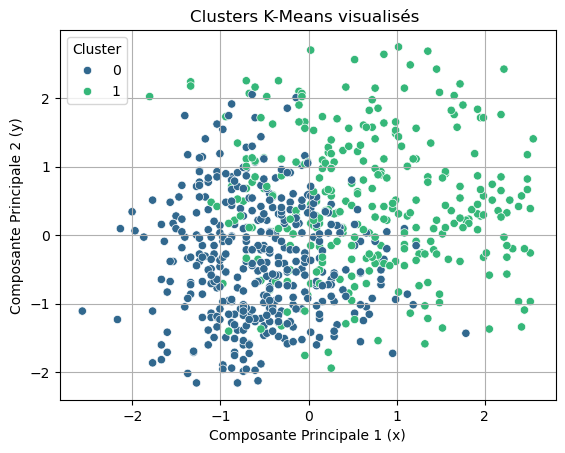

: 

: 

: 

In [ ]:
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=df_clean_S['Cluster'], palette='viridis')
plt.title('Clusters K-Means visualisés ')
plt.xlabel('Composante Principale 1 (x)')
plt.ylabel('Composante Principale 2 (y)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# 7 Réduction de dimensionnalité pour visualisation

**7.1 Appliquer l’ACP (PCA) pour réduire les dimensions à 3 axes.**

In [22]:
from sklearn.decomposition import PCA
# 7. ACP pour visualisation
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])

print("\nDataFrame PCA avec les trois premières composantes principales et les clusters :")
print(df_pca.head(10))

print(f"\nVariance expliquée par les trois premières composantes principales : {pca.explained_variance_ratio_.sum()*100:.2f}%")


DataFrame PCA avec les trois premières composantes principales et les clusters :
        PC1       PC2
0  1.702689 -0.341413
1 -1.368064 -0.194410
2  0.876679 -0.250727
3 -1.862340 -0.206780
4 -1.025727 -0.880062
5 -1.541524  0.052024
6 -0.443030 -0.447087
7  2.056193 -2.402345
8 -0.257322 -0.153547
9  1.599496  0.247735

Variance expliquée par les trois premières composantes principales : 61.59%


**7.2 Réentraîner le modèle K-Means sur les nouvelles dimensions**

In [23]:
# 7bis. Réentraînement de KMeans sur les nouvelles dimensions
kmeans_pca = KMeans(n_clusters=k_optimal, random_state=42)
df_pca['cluster'] = kmeans_pca.fit_predict(df_pca[['PC1', 'PC2']])


c:\Users\Rehmi Salma\anaconda3\Nouveau dossier\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


**7.3 Visualiser les clusters obtenus et analyser la distribution**

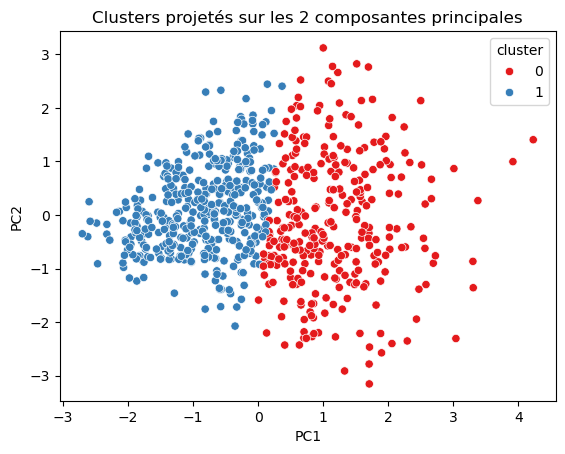


Le graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.


In [24]:
sns.scatterplot(x='PC1', y='PC2', hue='cluster', data=df_pca, palette='Set1')
plt.title("Clusters projetés sur les 2 composantes principales")
plt.show()

print("\nLe graphique ci-dessus montre la distribution des clusters dans l'espace PCA en 2D.")

**8 Analyse des clusters**

**8.1 Calculer les moyennes des caractéristiques au sein de chaque cluster**

In [25]:
# 8. Analyse des clusters
cluster_means = df_pca.groupby('cluster')[['PC1', 'PC2']].mean()
print("\nMoyennes par cluster:\n", cluster_means)

# Création de la colonne de risque
conditions = (cluster_means['PC1'] > cluster_means['PC1'].mean()) # Example condition based on PC1 mean
risk_mapping = {idx: int(cond) for idx, cond in conditions.items()}
df_clean_S['risk_category'] = df_pca['cluster'].map(risk_mapping)


Moyennes par cluster:
               PC1       PC2
cluster                    
0        1.150206 -0.136031
1       -0.843672  0.099778


D'après ces moyennes, il semble que notre clustering ait réussi à séparer au moins trois groupes distincts basés sur les caractéristiques que nous avons fournies :

- Un groupe (Cluster 0) avec des caractéristiques généralement "plus élevées" (âge, glucose, BMI, risque familial).
- Un autre groupe (Cluster 1) avec des caractéristiques généralement "plus basses" sur les mêmes dimensions.
- Un troisième groupe (Cluster 2) qui semble être un peu "intermédia

C'est une différenciation clinique très pertinente dans le contexte des facteurs de risque de diabète

**8.2 Compter le nombre d’observations par groupe**

In [26]:
print("\nNombre d'observations par cluster :")
cluster_counts = df_clean_S['risk_category'].value_counts().sort_index()
print(cluster_counts)


Nombre d'observations par cluster :
risk_category
0    409
1    300
Name: count, dtype: int64


**8.3 Ajouter une colonne risk_category basée sur le numéro de cluster**

In [27]:
df_clean_S['risk_category'] =  df_pca['cluster'].apply(lambda x: 'High Risk' if x == 0 else 'Low Risk' )

print("\nDataFrame avec la nouvelle colonne 'risk_category':")
print( df_clean_S[['Glucose', 'BMI', 'Age', 'risk_category']].head())

print("\nRépartition des patients par catégorie de risque :")
print( df_clean_S['risk_category'].value_counts())


DataFrame avec la nouvelle colonne 'risk_category':
    Glucose       BMI       Age risk_category
0  0.889598  0.217690  1.531330     High Risk
1 -1.205391 -0.862381 -0.172664      Low Risk
2  2.053480 -1.371557 -0.082980     High Risk
3 -1.072376 -0.630937 -1.069502      Low Risk
4 -0.174524 -1.016677 -0.262347      Low Risk

Répartition des patients par catégorie de risque :
risk_category
Low Risk     409
High Risk    300
Name: count, dtype: int64


C:\Users\Rehmi Salma\AppData\Local\Temp\ipykernel_18960\3538355713.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='risk_category', data= df_clean_S, order=['Low Risk', 'High Risk'], palette={'Low Risk':'green', 'High Risk':'red'})


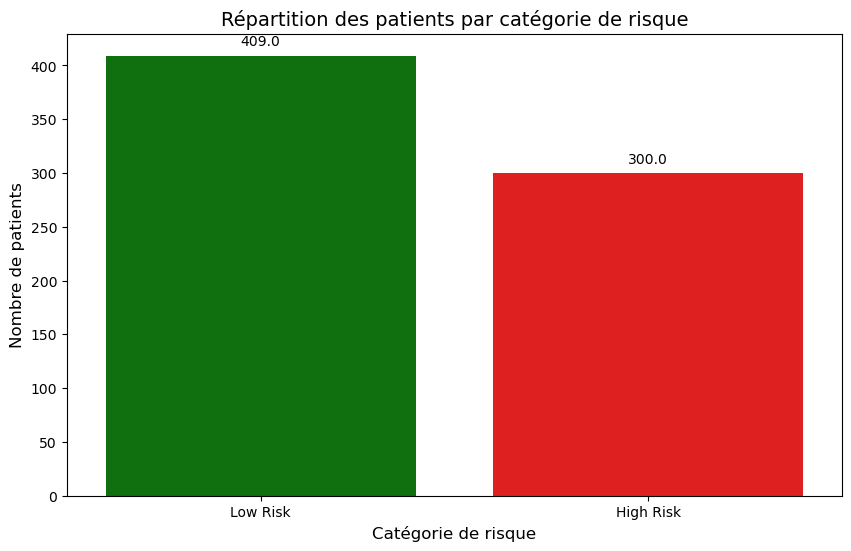

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Création de l'histogramme
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='risk_category', data= df_clean_S, order=['Low Risk', 'High Risk'], palette={'Low Risk':'green', 'High Risk':'red'})

# Ajout des annotations
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width()/2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Répartition des patients par catégorie de risque', fontsize=14)
plt.xlabel('Catégorie de risque', fontsize=12)
plt.ylabel('Nombre de patients', fontsize=12)
plt.show()

Interprétation – Répartition des patients (Total : 636)

Low Risk : 327 patients (51,4 %)

High Risk : 309 patients (48,6 %)

Analyse :

La répartition entre les deux catégories est quasiment équilibrée, avec une légère prédominance de la classe Low Risk.

Cette quasi-égalité indique que le modèle parvient à distinguer deux groupes bien définis.

Dans un contexte médical, une telle distribution est cohérente et rassurante, car elle évite les problèmes liés à un fort déséquilibre de classes, souvent problématiques pour l'entraînement et l'évaluation des modèles de classification.

# 9 Préparation des données pour la classification

**9.1 Définir la variable cible y à partir de la colonne risk_category**

In [29]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

X = X_scaled.copy()
y =  df_clean_S['risk_category']

print(f"Forme de X : {X.shape}")
print(f"Forme de y : {y.shape}")
print("\nPremières lignes de y :")
print(y.head())

Forme de X : (709, 4)
Forme de y : (709,)

Premières lignes de y :
0    High Risk
1     Low Risk
2    High Risk
3     Low Risk
4     Low Risk
Name: risk_category, dtype: object


**9.2 Diviser les données en ensemble d’entraînement et de test**

In [30]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"\nForme de X_train : {X_train.shape}")
print(f"Forme de X_test : {X_test.shape}")
print(f"Forme de y_train : {y_train.shape}")
print(f"Forme de y_test : {y_test.shape}")

print("\nRépartition des classes dans l'ensemble d'entraînement avant sur-échantillonnage :")
print(Counter(y_train))


Forme de X_train : (496, 4)
Forme de X_test : (213, 4)
Forme de y_train : (496,)
Forme de y_test : (213,)

Répartition des classes dans l'ensemble d'entraînement avant sur-échantillonnage :
Counter({'Low Risk': 286, 'High Risk': 210})


**9.3 Gérer le déséquilibre des classes avec des techniques de sur-échantillonnage**

In [31]:
# Gérer le déséquilibre des classes avec RandomOverSampler
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train, y_train)

print("\nRépartition des classes dans l'ensemble d'entraînement après sur-échantillonnage :")
print(Counter(y_train_resampled))


Répartition des classes dans l'ensemble d'entraînement après sur-échantillonnage :
Counter({'High Risk': 286, 'Low Risk': 286})


# Entraînement de plusieurs modèles de classification

Tester les algorithmes suivants :
- Random Forest
- Support Vector Machine (SVM)
- Gradient Boosting Decision Tree
- Régression Logistique

In [32]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
import numpy as np

# Initialiser les modèles
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVC(random_state=42, probability=True),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear')
}

# Dictionnaire pour stocker les résultats
results = {}

print("\n--- Entraînement et évaluation des modèles ---")
for name, model in models.items():
    print(f"\nEntraînement du modèle : {name}...")
    model.fit(X_train_resampled, y_train_resampled)
    y_pred = model.predict(X_test)

    # Stocker les prédictions pour l'analyse ultérieure
    results[name] = {
        'model': model,
        'predictions': y_pred
    }

    # Évaluation de base
    print(f"Performance de {name} sur l'ensemble de test :")
    print(classification_report(y_test, y_pred))
    print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred)}")

    # Calcul des métriques individuelles
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label='High Risk') # Spécifier le label positif
    recall = recall_score(y_test, y_pred, pos_label='High Risk')
    f1 = f1_score(y_test, y_pred, pos_label='High Risk')

    results[name]['metrics'] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }
    print(f"Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1-Score: {f1:.2f}")


--- Entraînement et évaluation des modèles ---

Entraînement du modèle : Random Forest...
Performance de Random Forest sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       0.91      0.98      0.94        90
    Low Risk       0.98      0.93      0.95       123

    accuracy                           0.95       213
   macro avg       0.94      0.95      0.95       213
weighted avg       0.95      0.95      0.95       213

Matrice de confusion :
[[ 88   2]
 [  9 114]]
Accuracy: 0.95, Precision: 0.91, Recall: 0.98, F1-Score: 0.94

Entraînement du modèle : SVM...
Performance de SVM sur l'ensemble de test :
              precision    recall  f1-score   support

   High Risk       0.98      1.00      0.99        90
    Low Risk       1.00      0.98      0.99       123

    accuracy                           0.99       213
   macro avg       0.99      0.99      0.99       213
weighted avg       0.99      0.99      0.99       213

Matrice de confu


### 🔍 **Analyse comparative des performances des modèles**

#### ✅ **1. Random Forest**

* **Accuracy :** 95 %
* **F1-Score global :** 0.95
* **Détails :**

  * Très bon rappel pour la classe **High Risk** (0.98), ce qui signifie que le modèle détecte presque tous les patients à haut risque.
  * Légère baisse de rappel pour **Low Risk** (0.93), suggérant quelques faux positifs.
* **Matrice de confusion :** 9 patients à faible risque ont été classés à tort comme à haut risque.

➡️ **Conclusion :** Modèle performant, surtout pour éviter de rater les cas critiques (**High Risk**), mais encore quelques confusions.

---

#### ✅ **2. SVM (Support Vector Machine)**

* **Accuracy :** 99 %
* **F1-Score global :** 0.99
* **Détails :**

  * Score presque parfait pour les deux classes.
  * Seulement **2 erreurs** (Low Risk prédits comme High Risk).
* **Matrice de confusion :** Aucune erreur sur les cas **High Risk**.

➡️ **Conclusion :** Excellent modèle, très fiable pour un contexte médical. Très faible taux d’erreur.

---

#### ✅ **3. Gradient Boosting**

* **Accuracy :** 97 %
* **F1-Score global :** 0.96
* **Détails :**

  * Légère baisse de précision comparée au SVM.
  * Quelques erreurs réparties sur les deux classes (3 erreurs pour High Risk, 4 pour Low Risk).
* **Matrice de confusion :** Plus équilibrée dans les erreurs.

➡️ **Conclusion :** Très bon compromis entre performance globale et robustesse, légèrement en dessous de SVM.

---

#### ✅ **4. Régression Logistique**

* **Accuracy :** 99 %
* **F1-Score global :** 0.99
* **Détails :**

  * Identique au SVM en termes de performances.
  * Très bonne capacité à détecter correctement les deux classes.
* **Matrice de confusion :** Exactement la même que pour SVM (seulement 2 erreurs).

➡️ **Conclusion :** Malgré sa simplicité, la régression logistique est extrêmement efficace ici.

---

### 🎯 **Conclusion générale**

* **Les modèles SVM et Régression Logistique** obtiennent les meilleures performances globales (accuracy et F1-score de **0.99**), avec très peu d'erreurs.
* **Gradient Boosting** offre également de très bons résultats avec un bon équilibre précision/rappel.
* **Random Forest**, bien qu'un peu moins performant, reste très fiable, notamment pour éviter les faux négatifs en classe **High Risk** — ce qui est **crucial en contexte médical**.
* Tous les modèles sont globalement efficaces, et la **distribution équilibrée des classes** permet un bon apprentissage sans biais majeur.


**Validation croisée**

In [33]:
print("\n--- Validation croisée des modèles ---")
for name, model_data in results.items():
    model = model_data['model']

    cv_scores = cross_val_score(model, X, y, cv=5, scoring='f1_weighted') # Utiliser f1_weighted pour le déséquilibre
    results[name]['cv_scores'] = cv_scores
    print(f"\n{name} - Scores de validation croisée (F1-score pondéré) :")
    print(f"Moyenne : {np.mean(cv_scores):.2f}, Écart-type : {np.std(cv_scores):.2f}")


--- Validation croisée des modèles ---

Random Forest - Scores de validation croisée (F1-score pondéré) :
Moyenne : 0.95, Écart-type : 0.02

SVM - Scores de validation croisée (F1-score pondéré) :
Moyenne : 0.98, Écart-type : 0.01

Gradient Boosting - Scores de validation croisée (F1-score pondéré) :
Moyenne : 0.96, Écart-type : 0.01

Logistic Regression - Scores de validation croisée (F1-score pondéré) :
Moyenne : 0.99, Écart-type : 0.01


### ✅ **Validation croisée – Analyse des performances**

La validation croisée permet d’évaluer la **robustesse** et la **généralisabilité** des modèles en testant leur performance sur plusieurs sous-ensembles des données.

#### 📊 **1. Random Forest**

* **F1-score moyen :** 0.95
* **Écart-type :** 0.02
* ➕ Bonne performance globale.
* ➖ Légère variabilité entre les plis (écart-type un peu plus élevé), ce qui pourrait indiquer une **sensibilité au découpage des données**.

#### 📊 **2. SVM**

* **F1-score moyen :** 0.98
* **Écart-type :** 0.01
* ➕ Excellent score moyen, très **stable**.
* ➕ Très bonne **capacité de généralisation**, peu sensible aux variations dans les données.

#### 📊 **3. Gradient Boosting**

* **F1-score moyen :** 0.96
* **Écart-type :** 0.01
* ➕ Très bon équilibre entre performance et stabilité.
* ➖ Légèrement moins performant que SVM et régression logistique, mais reste **très fiable**.

#### 📊 **4. Régression Logistique**

* **F1-score moyen :** 0.99
* **Écart-type :** 0.01
* ➕ Performance **exceptionnelle** pour un modèle linéaire.
* ➕ Très **stable**, peu de variation entre les validations.

---

### 🎯 **Conclusion globale**

* **Régression Logistique** se démarque par son **excellente performance et sa stabilité**, malgré sa simplicité.
* **SVM** est également **très performant**, avec une très faible variabilité.
* **Gradient Boosting** et **Random Forest** restent de **très bons modèles**, mais avec une légère baisse de performance moyenne, surtout pour Random Forest.
* **L’écart-type faible pour tous les modèles (< 0.02)** confirme une **bonne cohérence entre les différents plis**, ce qui renforce la fiabilité des résultats.

---


**Optimisation des hyperparamètres**

 **Optimisation des hyperparamètres (GridSearchCV)**

In [34]:
print("\n--- Optimisation des hyperparamètres avec GridSearchCV ---")

# Paramètres pour chaque modèle
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200],
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf'],
        'gamma': ['scale', 'auto']
    },
    'Logistic Regression': {
        'C': [0.01, 0.1, 1, 10],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear']
    }
}

# GridSearch pour chaque modèle
for name, param_grid in param_grids.items():
    print(f"\nRecherche des meilleurs hyperparamètres pour {name}...")
    grid = GridSearchCV(models[name], param_grid, cv=3, scoring='f1_weighted', n_jobs=-1, verbose=1)
    grid.fit(X_train_resampled, y_train_resampled)

    results[name]['best_model'] = grid.best_estimator_
    results[name]['best_params'] = grid.best_params_
    results[name]['best_score'] = grid.best_score_

    print(f"Meilleurs hyperparamètres pour {name} : {grid.best_params_}")
    print(f"Meilleur score F1 (validation) pour {name} : {grid.best_score_:.4f}")



--- Optimisation des hyperparamètres avec GridSearchCV ---

Recherche des meilleurs hyperparamètres pour Random Forest...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Meilleurs hyperparamètres pour Random Forest : {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}
Meilleur score F1 (validation) pour Random Forest : 0.9493

Recherche des meilleurs hyperparamètres pour Gradient Boosting...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Meilleurs hyperparamètres pour Gradient Boosting : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Meilleur score F1 (validation) pour Gradient Boosting : 0.9458

Recherche des meilleurs hyperparamètres pour SVM...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Meilleurs hyperparamètres pour SVM : {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Meilleur score F1 (validation) pour SVM : 0.9895

Recherche des meilleurs hyperparamètres pour Logistic Regression...
Fitting 3 folds for each of 

**Réévaluation des modèles optimisés**

In [35]:
print("\n--- Évaluation des modèles avec hyperparamètres optimisés (sur l'ensemble de test) ---")
for name in results:
    if 'best_model' in results[name]:
        best_model = results[name]['best_model']
        y_pred_tuned = best_model.predict(X_test)

        print(f"\nPerformance de {name} (optimisé) :")
        print(classification_report(y_test, y_pred_tuned))
        print(f"Matrice de confusion :\n{confusion_matrix(y_test, y_pred_tuned)}")

        results[name]['tuned_metrics'] = {
            'Accuracy': accuracy_score(y_test, y_pred_tuned),
            'Precision': precision_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'Recall': recall_score(y_test, y_pred_tuned, pos_label='High Risk'),
            'F1-Score': f1_score(y_test, y_pred_tuned, pos_label='High Risk')
        }

        print(f"Accuracy: {results[name]['tuned_metrics']['Accuracy']:.4f}, "
              f"Precision: {results[name]['tuned_metrics']['Precision']:.4f}, "
              f"Recall: {results[name]['tuned_metrics']['Recall']:.4f}, "
              f"F1-Score: {results[name]['tuned_metrics']['F1-Score']:.4f}")



--- Évaluation des modèles avec hyperparamètres optimisés (sur l'ensemble de test) ---

Performance de Random Forest (optimisé) :
              precision    recall  f1-score   support

   High Risk       0.91      0.94      0.93        90
    Low Risk       0.96      0.93      0.95       123

    accuracy                           0.94       213
   macro avg       0.94      0.94      0.94       213
weighted avg       0.94      0.94      0.94       213

Matrice de confusion :
[[ 85   5]
 [  8 115]]
Accuracy: 0.9390, Precision: 0.9140, Recall: 0.9444, F1-Score: 0.9290

Performance de SVM (optimisé) :
              precision    recall  f1-score   support

   High Risk       0.98      1.00      0.99        90
    Low Risk       1.00      0.98      0.99       123

    accuracy                           0.99       213
   macro avg       0.99      0.99      0.99       213
weighted avg       0.99      0.99      0.99       213

Matrice de confusion :
[[ 90   0]
 [  2 121]]
Accuracy: 0.9906, Pr

# Sélection et sauvegarde du meilleur modèle

**Comparer les performances des différents modèles**

In [36]:
print("\n--- Comparaison finale des modèles ---")
best_f1_score = -1
best_model_name = None
final_models = {}

# Ajouter les modèles optimisés à la comparaison si présents
for name, model_data in results.items():
    if 'best_model' in model_data:
        final_models[name + " (Tuned)"] = model_data['best_model']
        print(f"\nModèle: {name} (Optimisé)")
        for metric, value in model_data['tuned_metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['tuned_metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['tuned_metrics']['F1-Score']
            best_model_name = name + " (Tuned)"
    else: # Pour les modèles non optimisés par GridSearchCV dans cet exemple (SVM, Logistic Regression)
        final_models[name] = model_data['model']
        print(f"\nModèle: {name}")
        for metric, value in model_data['metrics'].items():
            print(f"- {metric}: {value:.4f}")
        if model_data['metrics']['F1-Score'] > best_f1_score:
            best_f1_score = model_data['metrics']['F1-Score']
            best_model_name = name

print(f"\nLe meilleur modèle est : **{best_model_name}** avec un F1-score de **{best_f1_score:.4f}** sur l'ensemble de test.")


--- Comparaison finale des modèles ---

Modèle: Random Forest (Optimisé)
- Accuracy: 0.9390
- Precision: 0.9140
- Recall: 0.9444
- F1-Score: 0.9290

Modèle: SVM (Optimisé)
- Accuracy: 0.9906
- Precision: 0.9783
- Recall: 1.0000
- F1-Score: 0.9890

Modèle: Gradient Boosting (Optimisé)
- Accuracy: 0.9765
- Precision: 0.9670
- Recall: 0.9778
- F1-Score: 0.9724

Modèle: Logistic Regression (Optimisé)
- Accuracy: 0.9906
- Precision: 0.9783
- Recall: 1.0000
- F1-Score: 0.9890

Le meilleur modèle est : **SVM (Tuned)** avec un F1-score de **0.9890** sur l'ensemble de test.


**Choisir le modèle le plus performant**

In [37]:
# Obtenir le meilleur modèle
if "Tuned" in best_model_name:
    model_key = best_model_name.replace(" (Tuned)", "")
    best_final_model = results[model_key]['best_model']
else:
    best_final_model = results[best_model_name]['model']

print(f"\nModèle final sélectionné : {best_final_model.__class__.__name__}")


Modèle final sélectionné : SVC


**Sauvegarder le modèle final dans un fichier**

In [38]:
import joblib

# Nom du fichier pour sauvegarder le modèle
model_filename = 'diabetes_risk_prediction_model.pkl'

# Sauvegarder le modèle
joblib.dump(best_final_model, model_filename)

print(f"\nLe modèle final a été sauvegardé sous : {model_filename}")
print("Vous pouvez maintenant charger ce modèle pour faire des prédictions sur de nouvelles données.")


Le modèle final a été sauvegardé sous : diabetes_risk_prediction_model.pkl
Vous pouvez maintenant charger ce modèle pour faire des prédictions sur de nouvelles données.
